In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/blinkit-sales-dataset/blinkit_customer_feedback.csv
/kaggle/input/blinkit-sales-dataset/blinkit_customers.csv
/kaggle/input/blinkit-sales-dataset/blinkit_order_items.csv
/kaggle/input/blinkit-sales-dataset/Category_Icons.xlsx
/kaggle/input/blinkit-sales-dataset/blinkit_inventory.csv
/kaggle/input/blinkit-sales-dataset/blinkit_delivery_performance.csv
/kaggle/input/blinkit-sales-dataset/Rating_Icon.xlsx
/kaggle/input/blinkit-sales-dataset/blinkit_inventoryNew.csv
/kaggle/input/blinkit-sales-dataset/blinkit_orders.csv
/kaggle/input/blinkit-sales-dataset/blinkit_marketing_performance.csv
/kaggle/input/blinkit-sales-dataset/blinkit_products.csv


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

## First Start With Blinkit Orders

In [3]:
blinkit_orders=pd.read_csv("/kaggle/input/blinkit-sales-dataset/blinkit_orders.csv")
blinkit_orders.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741


In [4]:
blinkit_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   order_date              5000 non-null   object 
 3   promised_delivery_time  5000 non-null   object 
 4   actual_delivery_time    5000 non-null   object 
 5   delivery_status         5000 non-null   object 
 6   order_total             5000 non-null   float64
 7   payment_method          5000 non-null   object 
 8   delivery_partner_id     5000 non-null   int64  
 9   store_id                5000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 390.8+ KB


Let's change the DataTypes and add columns for Time series analysis

In [5]:
blinkit_orders['order_date']=pd.to_datetime(blinkit_orders['order_date'])
blinkit_orders['promised_delivery_time']=pd.to_datetime(blinkit_orders['promised_delivery_time'])
blinkit_orders['actual_delivery_time']=pd.to_datetime(blinkit_orders['actual_delivery_time'])
blinkit_orders['Year']=blinkit_orders['order_date'].dt.year
blinkit_orders['Month']=blinkit_orders['order_date'].dt.month
blinkit_orders['MonthName'] = blinkit_orders['order_date'].dt.strftime('%B')  # For month name as a string

In [6]:
blinkit_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                5000 non-null   int64         
 1   customer_id             5000 non-null   int64         
 2   order_date              5000 non-null   datetime64[ns]
 3   promised_delivery_time  5000 non-null   datetime64[ns]
 4   actual_delivery_time    5000 non-null   datetime64[ns]
 5   delivery_status         5000 non-null   object        
 6   order_total             5000 non-null   float64       
 7   payment_method          5000 non-null   object        
 8   delivery_partner_id     5000 non-null   int64         
 9   store_id                5000 non-null   int64         
 10  Year                    5000 non-null   int32         
 11  Month                   5000 non-null   int32         
 12  MonthName               5000 non-null   object  

In [7]:
blinkit_orders.describe()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,order_total,delivery_partner_id,store_id,Year,Month
count,5.000000e+03,5.000000e+03,5000,5000,5000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.029129e+09,5.009685e+07,2024-01-09 00:36:06.259200,2024-01-09 00:51:05.743200256,2024-01-09 00:55:32.323200,2201.86170,50050.318200,4999.689000,2023.511200,6.643600
min,6.046500e+04,3.181300e+04,2023-03-16 08:10:44,2023-03-16 08:27:44,2023-03-16 08:24:44,13.25000,43.000000,1.000000,2023.000000,1.000000
25%,2.531421e+09,2.404314e+07,2023-08-17 01:54:09.249999872,2023-08-17 02:13:24.249999872,2023-08-17 02:27:24.249999872,1086.21500,24928.500000,2509.250000,2023.000000,4.000000
50%,5.074378e+09,4.997808e+07,2024-01-07 11:35:32,2024-01-07 11:47:02,2024-01-07 11:51:02,2100.69000,50262.500000,4987.000000,2024.000000,7.000000
75%,7.488579e+09,7.621215e+07,2024-06-03 20:53:15.750000128,2024-06-03 21:09:30.750000128,2024-06-03 21:09:30.750000128,3156.88250,74478.250000,7500.750000,2024.000000,9.000000
max,9.998298e+09,9.989390e+07,2024-11-04 20:29:15,2024-11-04 20:43:15,2024-11-04 20:47:15,6721.46000,99968.000000,9995.000000,2024.000000,12.000000
std,2.863533e+09,2.919082e+07,NaN,NaN,NaN,1303.02438,28802.276922,2886.089242,0.499925,3.058701


## Time Series Analysis

In [8]:
df_agg=blinkit_orders.groupby(['Year','MonthName','Month'])['order_total'].sum().reset_index().sort_values('Month')
df_agg

,Year,MonthName,Month,order_total
13,2024,January,1,560423.56
12,2024,February,2,545090.11
16,2024,March,3,543181.85
5,2023,March,3,272878.96
0,2023,April,4,554344.77
10,2024,April,4,538754.75
6,2023,May,5,608213.54
17,2024,May,5,574163.61
15,2024,June,6,539074.85
4,2023,June,6,505227.66


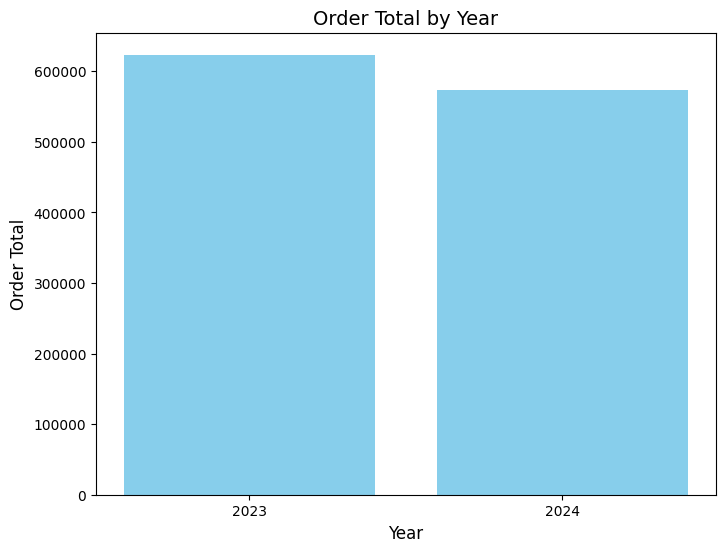

In [9]:
# Create the bar plot
plt.figure(figsize=(8, 6))  # Optional: to make the plot bigger
bars = plt.bar(df_agg['Year'], df_agg['order_total'], color='skyblue')

# Add title and labels
plt.title('Order Total by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Order Total', fontsize=12)


# Optional: set x-ticks to be exactly the years present in the data
plt.xticks(df_agg['Year'].unique(), rotation=0)

# Show the plot
plt.show()

In [10]:
fig1=px.line(df_agg,x='MonthName',y='order_total',color='Year')
# Update the layout to add a title
fig1.update_layout(title="Order Total Trends",
                      xaxis_title="Month",  # Title for the x-axis
    yaxis_title="Order Total")  # Title for the y-axis)

The order total for both 2023 (red line) and 2024 (blue line) remains relatively stable, fluctuating around the 500k-600k range for most months.
There is a general upward trend in the latter half of both years.

In [11]:
df_status=blinkit_orders.groupby('delivery_status')['order_id'].count().reset_index().rename(columns={'order_id':'Counts'})
df_status

,delivery_status,Counts
0,On Time,3470
1,Significantly Delayed,493
2,Slightly Delayed,1037


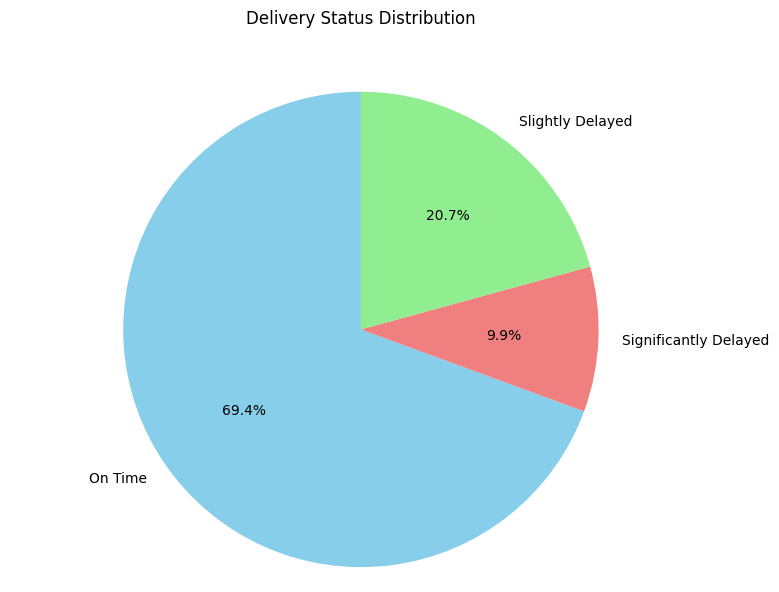

In [12]:
# Create a figure and axis to center the pie chart
fig, ax = plt.subplots(figsize=(8, 6))

# Create the pie chart
ax.pie(df_status['Counts'], labels=df_status['delivery_status'], 
       autopct='%1.1f%%', startangle=90, 
       colors=['skyblue', 'lightcoral', 'lightgreen'])

# Center the title and add padding
plt.title('Delivery Status Distribution', pad=20, y=1.05)

# Ensure the pie chart is circular and centered
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adjust layout to prevent text cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
df_payment= blinkit_orders.groupby('payment_method').agg({'order_total': 'sum', 'order_id': 'count'}).reset_index().rename(columns={'order_id':'order_counts'})
df_payment

,payment_method,order_total,order_counts
0,Card,2865557.53,1285
1,Cash,2770463.99,1257
2,UPI,2658282.71,1214
3,Wallet,2715004.27,1244


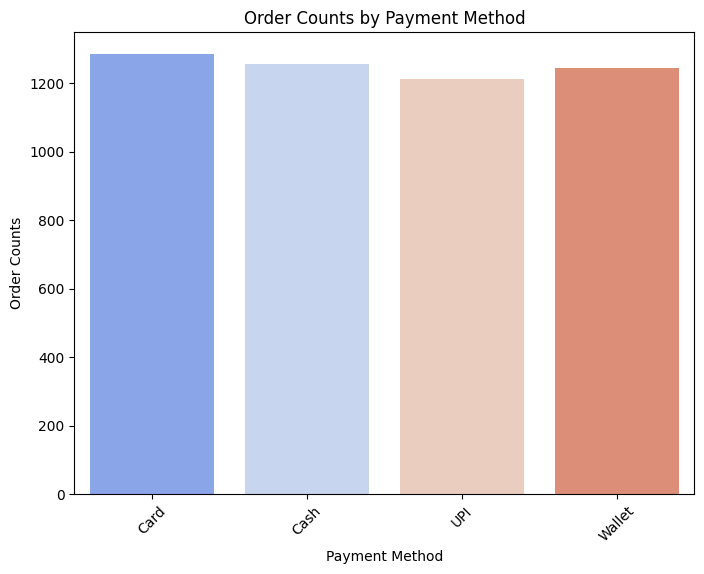

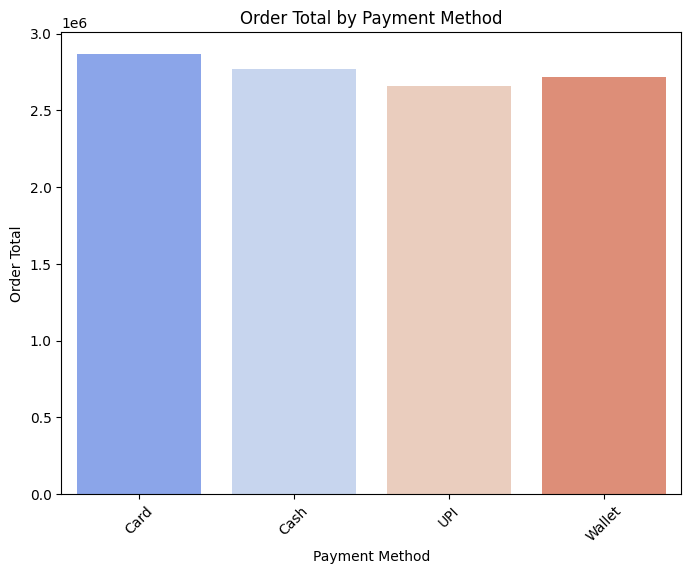

In [14]:
# Define columns to plot
columns_to_plot = ['order_counts', 'order_total']

# Loop through each column and create a bar plot
for col in columns_to_plot:
    plt.figure(figsize=(8, 6))  # Create a new figure for each plot
    sns.barplot(data=df_payment, x='payment_method', y=col, palette='coolwarm')
    plt.title(f'{col.replace("_", " ").title()} by Payment Method')
    plt.xlabel('Payment Method')
    plt.ylabel(col.replace("_", " ").title())  # Format label nicely
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()

## Delivery Performance

In [15]:
blinkit_delivery_performance=pd.read_csv("/kaggle/input/blinkit-sales-dataset/blinkit_delivery_performance.csv")

In [16]:
blinkit_delivery_performance.head()

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,On Time,NaN
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,On Time,Traffic
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,On Time,Traffic
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,On Time,NaN
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,On Time,Traffic


## Merge Both DF

In [17]:
df1=pd.merge(blinkit_orders,blinkit_delivery_performance[['order_id','delivery_time_minutes','distance_km','reasons_if_delayed']],how='left',on='order_id')

In [18]:
df1.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id,Year,Month,MonthName,delivery_time_minutes,distance_km,reasons_if_delayed
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771,2024,7,July,-5.0,0.96,NaN
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534,2024,5,May,2.0,0.98,Traffic
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886,2024,9,September,4.0,3.83,Traffic
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917,2023,11,November,-1.0,2.76,NaN
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741,2023,11,November,1.0,2.63,Traffic


In [19]:
df1['delivery_time'] = (df1['promised_delivery_time'] - df1['actual_delivery_time']).dt.total_seconds() / 60
df1['delivery_time_wrt_order_time'] = -(df1['order_date'] - df1['actual_delivery_time']).dt.total_seconds() / 60

In [20]:
df1['with_in_10_minutes']=df1['delivery_time_wrt_order_time'].apply(lambda x:'Within_10_minutes' if x<=10 else 'More than 10 minutes')
df1.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id,Year,Month,MonthName,delivery_time_minutes,distance_km,reasons_if_delayed,delivery_time,delivery_time_wrt_order_time,with_in_10_minutes
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771,2024,7,July,-5.0,0.96,NaN,5.0,13.0,More than 10 minutes
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534,2024,5,May,2.0,0.98,Traffic,-2.0,13.0,More than 10 minutes
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886,2024,9,September,4.0,3.83,Traffic,-4.0,22.0,More than 10 minutes
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917,2023,11,November,-1.0,2.76,NaN,1.0,17.0,More than 10 minutes
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741,2023,11,November,1.0,2.63,Traffic,-1.0,18.0,More than 10 minutes


## Labeling for Delivery Minutes

In [21]:
bins = [0, 10, 20, 30, 40, 50]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

In [22]:
df1['labels']=pd.cut(df1['delivery_time_wrt_order_time'], bins=bins, labels=labels,right=False)

In [23]:
label_counts=df1.groupby('labels')['order_id'].count().reset_index().rename(columns={'order_id':'counts'})
label_counts

<ipython-input-23-cef3c931273b>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,labels,counts
0,0-10,432
1,10-20,2541
2,20-30,1353
3,30-40,483
4,40-50,189


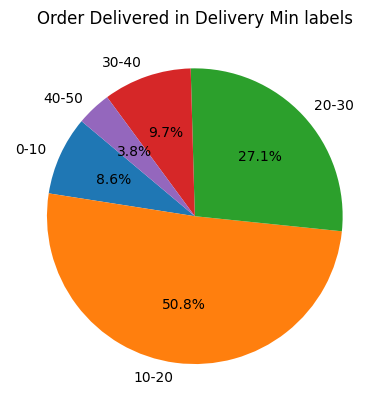

In [24]:
# Calculate total orders
total_orders = label_counts['counts'].sum()

# Plot Pie Chart
plt.pie(label_counts['counts'], labels=label_counts['labels'], autopct='%1.1f%%', startangle=140)
plt.title("Order Delivered in Delivery Min labels")

plt.show()

The analysis of delivery time distribution indicates that 50.8% of orders are delivered within 10-20 minutes, making it the most common delivery window. However, only 8.6% of orders are delivered within 10 minutes, which is significantly low. Additionally, 27.1% of orders take 20-30 minutes, suggesting potential inefficiencies in the delivery process.

To enhance customer satisfaction and maintain a competitive edge, it is crucial to reduce overall delivery times and improve the share of ultra-fast deliveries (within 10 minutes). Factors such as traffic congestion, order processing delays, and resource allocation inefficiencies may be contributing to extended delivery durations.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

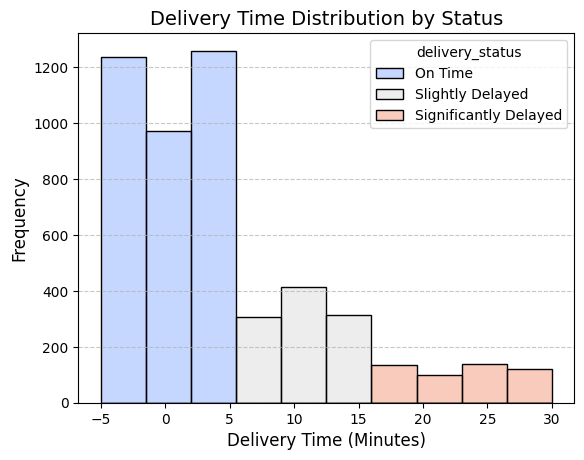

In [25]:
# Histogram with Seaborn, using hue for 'delivery_status'
sns.histplot(data=df1, x='delivery_time_minutes', bins=10, hue='delivery_status', palette='coolwarm', edgecolor='black')

# Titles and Labels
plt.title('Delivery Time Distribution by Status', fontsize=14)
plt.xlabel('Delivery Time (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [26]:
blinkit_order_items=pd.read_csv("/kaggle/input/blinkit-sales-dataset/blinkit_order_items.csv")
blinkit_order_items

,order_id,product_id,quantity,unit_price
0,1961864118,642612,3,517.03
1,1549769649,378676,1,881.42
2,9185164487,741341,2,923.84
3,9644738826,561860,1,874.78
4,5427684290,602241,2,976.55
...,...,...,...,...
4995,1669690997,925482,3,475.04
4996,8340761903,124290,2,39.65
4997,5936301790,491314,3,973.44
4998,5710579377,319388,2,657.80


In [27]:
blinkit_products=pd.read_csv("/kaggle/input/blinkit-sales-dataset/blinkit_products.csv")
blinkit_products

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55
...,...,...,...,...,...,...,...,...,...,...
263,444361,Pain Reliever,Pharmacy,"Prakash, Bawa and Kale",822.63,1028.29,20.0,365,20,71
264,679284,Cough Syrup,Pharmacy,Pant LLC,877.89,1097.36,20.0,365,28,95
265,240179,Cough Syrup,Pharmacy,Ram-Suri,90.56,113.20,20.0,365,20,56
266,673058,Cough Syrup,Pharmacy,Balan-Madan,765.76,957.20,20.0,365,30,94


## Product Analysis

In [28]:
products_df=pd.merge(blinkit_order_items,blinkit_products,how='left',on='product_id')
products_df

,order_id,product_id,quantity,unit_price,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,1961864118,642612,3,517.03,Pet Treats,Pet Care,Pillay-Ahuja,517.03,795.43,35.0,365,16,57
1,1549769649,378676,1,881.42,Orange Juice,Cold Drinks & Juices,Baral-Kamdar,881.42,1259.17,30.0,180,19,65
2,9185164487,741341,2,923.84,Eggs,Dairy & Breakfast,Prasad LLC,923.84,1154.80,20.0,7,13,62
3,9644738826,561860,1,874.78,Orange Juice,Cold Drinks & Juices,Gupta Ltd,874.78,1249.69,30.0,180,21,90
4,5427684290,602241,2,976.55,Nuts,Snacks & Munchies,Bahl-Pau,976.55,1502.38,35.0,90,12,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1669690997,925482,3,475.04,Frozen Biryani,Instant & Frozen Food,Viswanathan-Sha,475.04,791.73,40.0,180,23,66
4996,8340761903,124290,2,39.65,Lotion,Personal Care,Sachdev Group,39.65,61.00,35.0,365,23,71
4997,5936301790,491314,3,973.44,Ice Cream,Instant & Frozen Food,Banerjee Inc,973.44,1622.40,40.0,180,11,71
4998,5710579377,319388,2,657.80,Orange Juice,Cold Drinks & Juices,D’Alia-Dey,657.80,939.71,30.0,180,26,56


In [29]:
products_df['total_product_amount']=products_df['quantity']*products_df['unit_price']
products_df

,order_id,product_id,quantity,unit_price,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level,total_product_amount
0,1961864118,642612,3,517.03,Pet Treats,Pet Care,Pillay-Ahuja,517.03,795.43,35.0,365,16,57,1551.09
1,1549769649,378676,1,881.42,Orange Juice,Cold Drinks & Juices,Baral-Kamdar,881.42,1259.17,30.0,180,19,65,881.42
2,9185164487,741341,2,923.84,Eggs,Dairy & Breakfast,Prasad LLC,923.84,1154.80,20.0,7,13,62,1847.68
3,9644738826,561860,1,874.78,Orange Juice,Cold Drinks & Juices,Gupta Ltd,874.78,1249.69,30.0,180,21,90,874.78
4,5427684290,602241,2,976.55,Nuts,Snacks & Munchies,Bahl-Pau,976.55,1502.38,35.0,90,12,75,1953.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1669690997,925482,3,475.04,Frozen Biryani,Instant & Frozen Food,Viswanathan-Sha,475.04,791.73,40.0,180,23,66,1425.12
4996,8340761903,124290,2,39.65,Lotion,Personal Care,Sachdev Group,39.65,61.00,35.0,365,23,71,79.30
4997,5936301790,491314,3,973.44,Ice Cream,Instant & Frozen Food,Banerjee Inc,973.44,1622.40,40.0,180,11,71,2920.32
4998,5710579377,319388,2,657.80,Orange Juice,Cold Drinks & Juices,D’Alia-Dey,657.80,939.71,30.0,180,26,56,1315.60


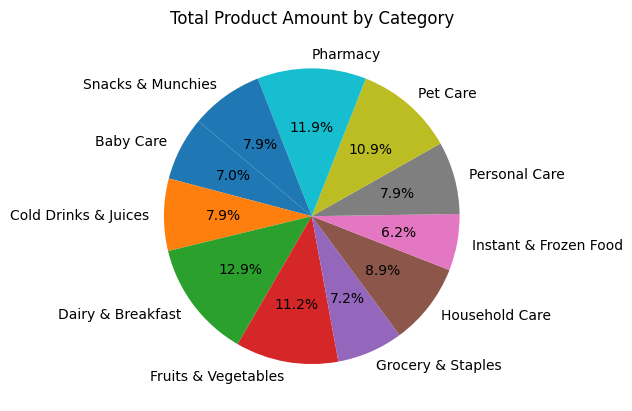

In [30]:
# Aggregate numerical data by category
category_agg = products_df.groupby('category')['total_product_amount'].sum()

# Create the pie chart
plt.pie(category_agg, labels=category_agg.index, autopct='%1.1f%%', startangle=140)
plt.title("Total Product Amount by Category")
plt.show()

## Customer Analysis including RFM Analysis

In [31]:
blinkit_customers=pd.read_csv("/kaggle/input/blinkit-sales-dataset/blinkit_customers.csv")
blinkit_customers

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48
2,47822591,Hema Bahri,samiazaan@example.com,910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81
3,79726146,Zaitra Vig,ishanvi87@example.org,916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09
4,57102800,Januja Verma,atideshpande@example.org,917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14
...,...,...,...,...,...,...,...,...,...,...,...
2495,48002829,Daksh Mandal,varkeymohammed@example.com,919587731286,"28/42, Venkataraman Ganj, Kishanganj-360157",Mumbai,45238,2024-01-25,Inactive,17,754.33
2496,57392064,Lavanya Jain,deshpandeom@example.com,916137420258,"391, Edwin Path, Korba 202726",Udupi,688100,2024-06-23,Regular,4,1540.81
2497,71688530,Umang Dash,gokhalenicholas@example.org,917595275963,"151, Parmer Ganj\nLoni 906431",Kavali,528749,2024-03-18,Regular,1,1541.22
2498,89051578,Zinal Natarajan,vyasfrado@example.com,911994009448,"H.No. 172, Khanna Street, Pudukkottai 610564",Alwar,586734,2024-09-06,Premium,12,1185.50


In [32]:
customer_analysis=blinkit_customers.groupby('area')['total_orders'].sum().reset_index().sort_values(by='total_orders', ascending=False)
customer_analysis

,area,total_orders
80,Deoghar,200
218,Orai,190
130,Jalna,175
34,Bathinda,168
174,Machilipatnam,164
...,...,...
210,Nashik,16
128,Jalandhar,15
192,Moradabad,15
199,Muzaffarpur,15


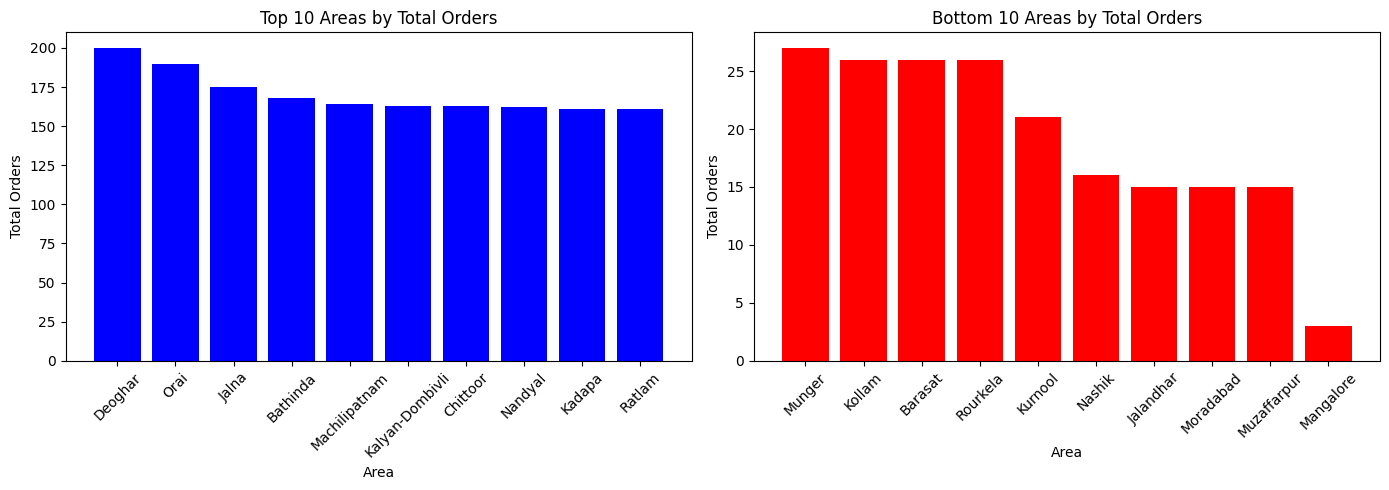

In [33]:
top_10_areas=customer_analysis.head(10)
bottom_10_areas=customer_analysis.tail(10)

# Create Figure and Subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Plot Top 10 Areas
axes[0].bar(top_10_areas['area'], top_10_areas['total_orders'], color='blue')
axes[0].set_title("Top 10 Areas by Total Orders")
axes[0].set_xlabel("Area")
axes[0].set_ylabel("Total Orders")
axes[0].tick_params(axis='x', rotation=45)  # Rotate labels for readability

# Plot Bottom 10 Areas
axes[1].bar(bottom_10_areas['area'], bottom_10_areas['total_orders'], color='red')
axes[1].set_title("Bottom 10 Areas by Total Orders")
axes[1].set_xlabel("Area")
axes[1].set_ylabel("Total Orders")
axes[1].tick_params(axis='x', rotation=45)  # Rotate labels for readability

# Adjust layout
plt.tight_layout()

# Show Plots
plt.show()

In [34]:
# Convert customer IDs from orders into a list
customers_list = blinkit_orders['customer_id'].tolist()  

# Use vectorized `isin()` instead of `apply()`
blinkit_customers['Ordered_Not_ordered'] = blinkit_customers['customer_id'].isin(customers_list).map({True: 'Ordered', False: 'Not Ordered'})


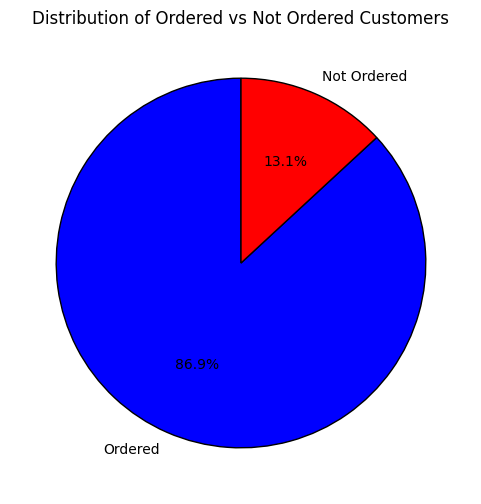

In [35]:
order_counts = blinkit_customers['Ordered_Not_ordered'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(order_counts, labels=order_counts.index, autopct='%1.1f%%', colors=['blue', 'red'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Distribution of Ordered vs Not Ordered Customers")
plt.show()


The data indicates that 86.9% of customers have placed orders, while 13.1% have not ordered. The non-ordering segment represents a potential risk of customer churn, which could impact revenue and customer retention in the long run.

## RFM Analysis

**RFM (Recency, Frequency, and Monetary)** analysis is a customer segmentation technique used to evaluate and rank customers based on their purchasing behavior. It helps businesses identify high-value customers, predict churn, and design targeted marketing strategies.

**Recency (R)** – How recently a customer made a purchase. Recent buyers are more likely to purchase again.

**Frequency (F)** – How often a customer makes a purchase. Frequent buyers indicate strong customer loyalty.

**Monetary (M)** – The total amount a customer has spent. High spenders contribute significantly to revenue.

By analyzing these three factors, businesses can classify customers into segments such as loyal customers, potential churners, and inactive users, allowing for personalized engagement strategies to drive retention and maximize revenue. 

In [36]:
date = pd.to_datetime('2025-03-01')


customer_recency=blinkit_orders.groupby('customer_id')['order_date'].max().reset_index()
# Calculate recency (days since last order)
customer_recency['Recency'] = (date - customer_recency['order_date']).dt.days
customer_recency

,customer_id,order_date,Recency
0,31813,2024-10-10 13:10:15,141
1,61020,2024-08-31 14:07:08,181
2,119099,2024-05-24 16:36:21,280
3,188838,2024-02-19 14:40:22,375
4,191616,2024-05-24 07:26:24,280
...,...,...,...
2167,99734256,2024-09-11 00:18:18,170
2168,99772709,2024-10-03 20:46:07,148
2169,99784559,2023-04-08 08:15:45,692
2170,99824171,2024-06-13 04:42:25,260


In [37]:
RFM_df=pd.merge(blinkit_customers,customer_recency[['customer_id','Recency']],how='inner',on='customer_id')
RFM_df

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value,Ordered_Not_ordered,Recency
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92,Ordered,231
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48,Ordered,358
2,47822591,Hema Bahri,samiazaan@example.com,910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81,Ordered,670
3,79726146,Zaitra Vig,ishanvi87@example.org,916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09,Ordered,528
4,57102800,Januja Verma,atideshpande@example.org,917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14,Ordered,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,97484394,Ayush Choudhry,deoikshita@example.org,919444247870,"57/065, Gala Path\nHindupur 640702",Jaipur,577563,2024-04-05,Inactive,4,669.01,Ordered,224
2168,65895091,Chaitaly Shere,vedhikakeer@example.com,919296110004,"H.No. 021\nBalan Road, Kadapa-276118",Orai,59036,2023-11-11,Inactive,8,1634.33,Ordered,352
2169,48002829,Daksh Mandal,varkeymohammed@example.com,919587731286,"28/42, Venkataraman Ganj, Kishanganj-360157",Mumbai,45238,2024-01-25,Inactive,17,754.33,Ordered,224
2170,57392064,Lavanya Jain,deshpandeom@example.com,916137420258,"391, Edwin Path, Korba 202726",Udupi,688100,2024-06-23,Regular,4,1540.81,Ordered,316


In [38]:
RFM_df['Monetary']=RFM_df['avg_order_value']*RFM_df['total_orders']

In [39]:
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

RFM_df['RecencyScore'] = pd.cut(RFM_df['Recency'], bins=5, labels=recency_scores)
RFM_df['FrequencyScore'] = pd.cut(RFM_df['total_orders'], bins=5, labels=frequency_scores)## Total orders are considerd as frequency
RFM_df['MonetaryScore'] = pd.cut(RFM_df['Monetary'], bins=5, labels=monetary_scores)
RFM_df


,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value,Ordered_Not_ordered,Recency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92,Ordered,231,5874.96,5,4,1
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48,Ordered,358,3301.92,3,1,1
2,47822591,Hema Bahri,samiazaan@example.com,910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81,Ordered,670,33486.77,1,5,5
3,79726146,Zaitra Vig,ishanvi87@example.org,916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09,Ordered,528,880.36,2,1,1
4,57102800,Januja Verma,atideshpande@example.org,917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14,Ordered,209,8093.96,5,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,97484394,Ayush Choudhry,deoikshita@example.org,919444247870,"57/065, Gala Path\nHindupur 640702",Jaipur,577563,2024-04-05,Inactive,4,669.01,Ordered,224,2676.04,5,1,1
2168,65895091,Chaitaly Shere,vedhikakeer@example.com,919296110004,"H.No. 021\nBalan Road, Kadapa-276118",Orai,59036,2023-11-11,Inactive,8,1634.33,Ordered,352,13074.64,4,2,2
2169,48002829,Daksh Mandal,varkeymohammed@example.com,919587731286,"28/42, Venkataraman Ganj, Kishanganj-360157",Mumbai,45238,2024-01-25,Inactive,17,754.33,Ordered,224,12823.61,5,5,2
2170,57392064,Lavanya Jain,deshpandeom@example.com,916137420258,"391, Edwin Path, Korba 202726",Udupi,688100,2024-06-23,Regular,4,1540.81,Ordered,316,6163.24,4,1,1


In [40]:
# Convert RFM scores to numeric type
RFM_df['RecencyScore'] = RFM_df['RecencyScore'].astype(int)
RFM_df['FrequencyScore'] = RFM_df['FrequencyScore'].astype(int)
RFM_df['MonetaryScore'] = RFM_df['MonetaryScore'].astype(int)

In [41]:
# Calculate RFM score by combining the individual scores
RFM_df['RFM_Score'] = RFM_df['RecencyScore'] + RFM_df['FrequencyScore'] + RFM_df['MonetaryScore']

# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
RFM_df['Value Segment'] = pd.qcut(RFM_df['RFM_Score'], q=3, labels=segment_labels)

In [42]:
# RFM Segment Distribution
segment_counts = RFM_df['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']

pastel_colors = px.colors.qualitative.Pastel

# Create the bar chart
fig_segment_dist = px.bar(segment_counts, x='Value Segment', y='Count', 
                          color='Value Segment', color_discrete_sequence=pastel_colors,
                          title='RFM Value Segment Distribution')

# Update the layout
fig_segment_dist.update_layout(xaxis_title='RFM Value Segment',
                              yaxis_title='Count',
                              showlegend=False)

# Show the figure
fig_segment_dist.show()

In [43]:
# Create a new column for RFM Customer Segments
RFM_df['RFM Customer Segments'] = ''

# Assign RFM segments based on the RFM score
RFM_df.loc[RFM_df['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
RFM_df.loc[(RFM_df['RFM_Score'] >= 6) & (RFM_df['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
RFM_df.loc[(RFM_df['RFM_Score'] >= 5) & (RFM_df['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
RFM_df.loc[(RFM_df['RFM_Score'] >= 4) & (RFM_df['RFM_Score'] < 5), 'RFM Customer Segments'] = "Can't Lose"
RFM_df.loc[(RFM_df['RFM_Score'] >= 3) & (RFM_df['RFM_Score'] < 4), 'RFM Customer Segments'] = "Lost"

# Print the updated data with RFM segments
RFM_df[['customer_id', 'RFM Customer Segments']]

,customer_id,RFM Customer Segments
0,97475543,Champions
1,22077605,At Risk Customers
2,47822591,Champions
3,79726146,Can't Lose
4,57102800,Champions
...,...,...
2167,97484394,Potential Loyalists
2168,65895091,Potential Loyalists
2169,48002829,Champions
2170,57392064,Potential Loyalists


In [44]:
segment_product_counts = RFM_df.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name='Count')

segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)


fig_treemap_segment_product = px.treemap(
    segment_product_counts, 
    path=['Value Segment', 'RFM Customer Segments'], 
    values='Count',
    color='Value Segment', 
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title='RFM Customer Segments by Value'
)

# Increase figure size
fig_treemap_segment_product.update_layout(
    width=1000,  # Increase width (default is smaller)
    height=700,  # Increase height for better visibility
    font=dict(size=14)  # Adjust font size for readability
)

fig_treemap_segment_product.show()

<ipython-input-44-9a4aabd41e03>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [45]:
print('Those customers who has high RFM score with high Moentary Values but not ordering now')
RFM_df[(RFM_df['RFM_Score'] >= 9) & (RFM_df['customer_segment'] == 'Inactive')].sort_values(
    by=['RFM_Score', 'Monetary'], 
    ascending=False
)


Those customers who has high RFM score with high Moentary Values but not ordering now


,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value,Ordered_Not_ordered,Recency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment,RFM Customer Segments
1747,90666073,Pratyush Dhar,qadimtak@example.org,910551255481,H.No. 98\nGera Street\nHajipur 667487,Farrukhabad,286455,2023-12-10,Inactive,20,1969.45,Ordered,201,39389.00,5,5,5,15,High-Value,Champions
1632,42366724,Quincy Kari,gopaldugar@example.org,910861921705,39/64\nVig Zila\nJaipur-137064,Saharanpur,260071,2023-07-27,Inactive,20,1896.27,Ordered,143,37925.40,5,5,5,15,High-Value,Champions
1993,96109948,Riya Wason,kotharizaitra@example.com,915128298547,"90/533, Bakshi Zila, Kakinada-718472",Shivpuri,528740,2023-08-12,Inactive,20,1879.13,Ordered,178,37582.60,5,5,5,15,High-Value,Champions
1136,76971644,Banjeet Pal,jaggigaurang@example.net,918326420171,"93/149, Bumb Chowk, Guwahati 790333",Thoothukudi,796020,2024-09-20,Inactive,20,1812.27,Ordered,186,36245.40,5,5,5,15,High-Value,Champions
391,93341057,Ayaan Tiwari,nagiyashica@example.net,912233062532,"74/730\nZacharia Road, Karawal Nagar-451755",Maheshtala,660740,2023-10-15,Inactive,20,1783.53,Ordered,202,35670.60,5,5,5,15,High-Value,Champions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,4386273,Jagrati Sengupta,pandeymahika@example.org,911622184828,"20, Jayaraman Zila\nKhora -207127",Nandyal,494307,2024-06-26,Inactive,12,298.97,Ordered,193,3587.64,5,3,1,9,Mid-Value,Champions
424,35459748,Ekbal Dasgupta,kchaudhary@example.org,910020908360,"88/275\nDasgupta Ganj, Giridih 295131",Firozabad,635776,2024-01-29,Inactive,12,288.29,Ordered,132,3459.48,5,3,1,9,Mid-Value,Champions
249,17597449,Umang Dhingra,pprabhakar@example.com,916003995803,"47\nPatil Circle, Srikakulam 796222",Guna,433729,2023-04-06,Inactive,15,229.40,Ordered,239,3441.00,4,4,1,9,Mid-Value,Champions
571,81174361,Shivansh Sawhney,kkhalsa@example.org,915425736706,"H.No. 92\nVenkatesh Circle, Burhanpur-429078",Bhopal,487403,2024-07-16,Inactive,12,223.29,Ordered,181,2679.48,5,3,1,9,Mid-Value,Champions


In [46]:
print("🔍 Those customers who have a high RFM score with high Monetary Values but are not ordering now:\n")

# Filter the required customers
high_value_inactive_customers = RFM_df[(RFM_df['RFM_Score'] >= 9) & (RFM_df['customer_segment'] == 'Inactive')]

# Sort by RFM Score and Monetary Value
high_value_inactive_customers = high_value_inactive_customers.sort_values(
    by=['RFM_Score', 'Monetary'], 
    ascending=False
)

# Display summary insights
print(f"Total such customers: {len(high_value_inactive_customers)}")
print(f"Highest Monetary Value: {high_value_inactive_customers['Monetary'].max()}")
print(f"Average Monetary Value: {high_value_inactive_customers['Monetary'].mean():.2f}")
print("\nTop 5 high-value inactive customers:\n")
high_value_inactive_customers.head()

🔍 Those customers who have a high RFM score with high Monetary Values but are not ordering now:

Total such customers: 255
Highest Monetary Value: 39389.0
Average Monetary Value: 17859.49

Top 5 high-value inactive customers:



,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value,Ordered_Not_ordered,Recency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment,RFM Customer Segments
1747,90666073,Pratyush Dhar,qadimtak@example.org,910551255481,H.No. 98\nGera Street\nHajipur 667487,Farrukhabad,286455,2023-12-10,Inactive,20,1969.45,Ordered,201,39389.0,5,5,5,15,High-Value,Champions
1632,42366724,Quincy Kari,gopaldugar@example.org,910861921705,39/64\nVig Zila\nJaipur-137064,Saharanpur,260071,2023-07-27,Inactive,20,1896.27,Ordered,143,37925.4,5,5,5,15,High-Value,Champions
1993,96109948,Riya Wason,kotharizaitra@example.com,915128298547,"90/533, Bakshi Zila, Kakinada-718472",Shivpuri,528740,2023-08-12,Inactive,20,1879.13,Ordered,178,37582.6,5,5,5,15,High-Value,Champions
1136,76971644,Banjeet Pal,jaggigaurang@example.net,918326420171,"93/149, Bumb Chowk, Guwahati 790333",Thoothukudi,796020,2024-09-20,Inactive,20,1812.27,Ordered,186,36245.4,5,5,5,15,High-Value,Champions
391,93341057,Ayaan Tiwari,nagiyashica@example.net,912233062532,"74/730\nZacharia Road, Karawal Nagar-451755",Maheshtala,660740,2023-10-15,Inactive,20,1783.53,Ordered,202,35670.6,5,5,5,15,High-Value,Champions


So here we can see that 255 cutsomers are those who has high monetary values so we need to identify the reasons why they are not ordering now.

In [47]:
blinkit_customer_feedback=pd.read_csv("/kaggle/input/blinkit-sales-dataset/blinkit_customer_feedback.csv")
blinkit_customer_feedback.head()

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20


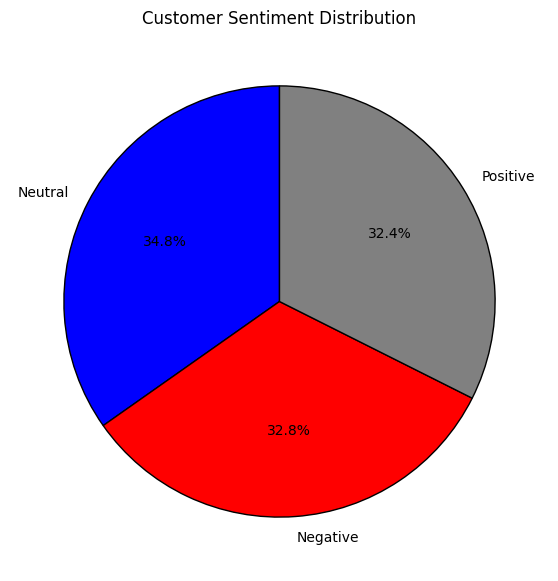

In [48]:
# Count of each sentiment
sentiments_counts = blinkit_customer_feedback['sentiment'].value_counts()

# Define colors for all three sentiments
colors = ['blue', 'red', 'gray']

# Create Pie Chart
plt.figure(figsize=(7, 7))  # Slightly larger for better visibility
plt.pie(
    sentiments_counts, 
    labels=sentiments_counts.index, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=90, 
    wedgeprops={'edgecolor': 'black'}
)

# Title
plt.title("Customer Sentiment Distribution")

# Show Chart
plt.show()


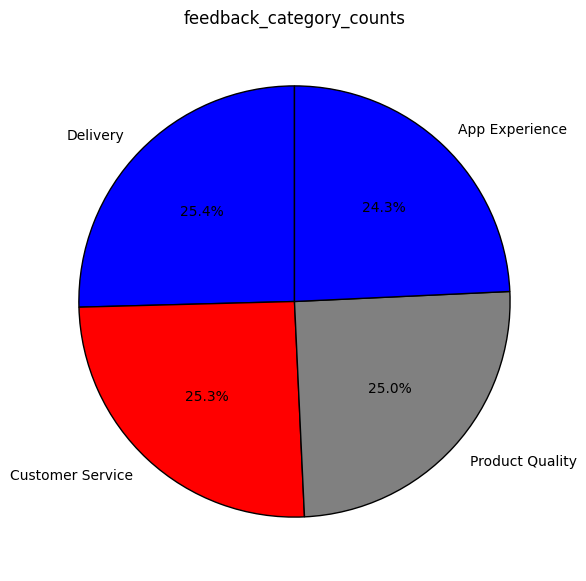

In [49]:
# Count of each sentiment
feedback_category_counts = blinkit_customer_feedback['feedback_category'].value_counts()

# Define colors for all three sentiments
colors = ['blue', 'red', 'gray']

# Create Pie Chart
plt.figure(figsize=(7, 7))  # Slightly larger for better visibility
plt.pie(
    feedback_category_counts, 
    labels=feedback_category_counts.index, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=90, 
    wedgeprops={'edgecolor': 'black'}
)

# Title
plt.title("feedback_category_counts")

# Show Chart
plt.show()


From above mentioned vizual we can assume that Customer service & late delivery might be the reason of those inactive customers

In [50]:
high_value_inactive_customers.shape

(255, 20)

In [51]:
sentiments_df=blinkit_customer_feedback[blinkit_customer_feedback['customer_id'].isin(high_value_inactive_customers['customer_id'].to_list())]
sentiments_df

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
12,3081099,9171116867,87107263,4,The product met my expectations.,Customer Service,Neutral,2023-10-22
14,9465932,5868326481,37556526,4,"Nothing to complain about, but nothing excepti...",Product Quality,Neutral,2024-03-15
21,9592296,7169557514,84824280,2,Customer service was not helpful.,Product Quality,Negative,2023-03-21
28,1477592,6037899648,22738465,3,"Delivery was fine, but the product could be be...",Product Quality,Neutral,2024-03-27
30,8804364,3286177534,10225164,3,The product met my expectations.,Delivery,Neutral,2023-06-25
...,...,...,...,...,...,...,...,...
4968,9535741,9423261830,17597449,1,Product was damaged during delivery.,Customer Service,Negative,2023-08-24
4983,2088066,4989511905,41972994,2,Not worth the price I paid.,Delivery,Negative,2023-04-03
4984,1504694,2520527893,51476157,2,The order was incorrect.,Product Quality,Negative,2024-10-02
4986,5470914,8285547588,26245432,3,"Average experience, could improve.",Customer Service,Neutral,2024-01-02


In [52]:
sentiments_df.sentiment.value_counts()

sentiment
Neutral     213
Negative    210
Positive    208
Name: count, dtype: int64

210 feedbacks having negative sentiments

## Profit calculation with few Assumptions

In [53]:
blinkit_order_items['total_product_value']=blinkit_order_items['quantity']*blinkit_order_items['unit_price']


In [54]:
orders=blinkit_order_items.groupby('order_id')['total_product_value'].sum().reset_index()
orders

,order_id,total_product_value
0,60465,1652.42
1,2237858,799.46
2,3101265,44.35
3,5120698,53.49
4,5512907,958.02
...,...,...
4995,9993542681,951.43
4996,9996182478,841.05
4997,9997121955,1989.12
4998,9997994965,621.38


In [55]:
margin_df=pd.merge(blinkit_orders[['order_id','order_date','MonthName','order_total']],orders,how='left',on='order_id')
margin_df['Profit']=(margin_df['order_total']-margin_df['total_product_value'])/margin_df['total_product_value']*100
margin_df

,order_id,order_date,MonthName,order_total,total_product_value,Profit
0,1961864118,2024-07-17 08:34:01,July,3197.07,1551.09,106.117633
1,1549769649,2024-05-28 13:14:29,May,976.55,881.42,10.792812
2,9185164487,2024-09-23 13:07:12,September,839.05,1847.68,-54.588998
3,9644738826,2023-11-24 16:16:56,November,440.23,874.78,-49.675347
4,5427684290,2023-11-20 05:00:39,November,2526.68,1953.10,29.367672
...,...,...,...,...,...,...
4995,1669690997,2023-12-25 15:46:20,December,1132.33,1425.12,-20.544937
4996,8340761903,2023-11-27 09:18:43,November,2372.01,79.30,2891.185372
4997,5936301790,2024-06-21 19:09:09,June,3158.35,2920.32,8.150819
4998,5710579377,2024-06-06 14:58:13,June,1918.92,1315.60,45.858924


In [56]:
# Convert order_date to the first day of its month
margin_df['first_date_of_month'] = margin_df['order_date'].dt.to_period('M').dt.to_timestamp()
profit_df=margin_df.groupby('first_date_of_month')['Profit'].mean().reset_index()
profit_df

,first_date_of_month,Profit
0,2023-03-01,434.506402
1,2023-04-01,631.131565
2,2023-05-01,532.664936
3,2023-06-01,531.106867
4,2023-07-01,542.076776
5,2023-08-01,617.664140
6,2023-09-01,539.711019
7,2023-10-01,404.477165
8,2023-11-01,479.062718
9,2023-12-01,592.569831


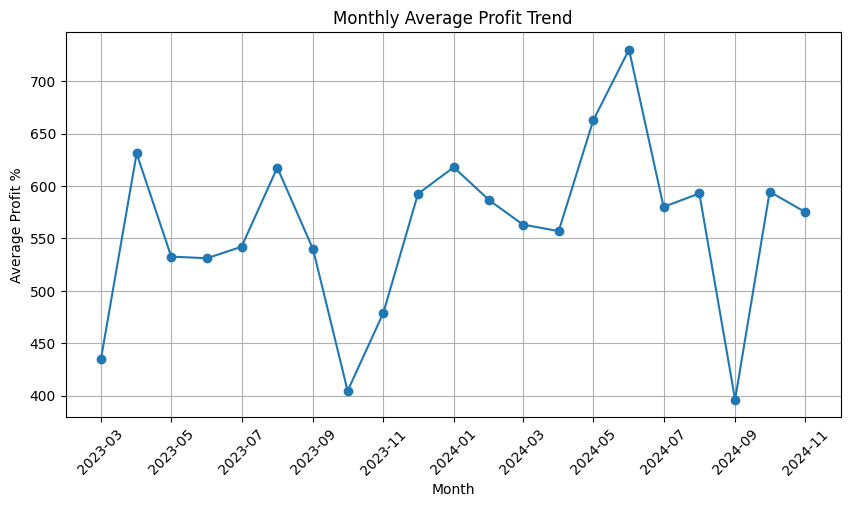

In [57]:
# Line chart
plt.figure(figsize=(10, 5))
plt.plot(profit_df['first_date_of_month'], profit_df['Profit'], marker='o', linestyle='-')

# Labels and Title
plt.xlabel("Month")
plt.ylabel("Average Profit %")
plt.title("Monthly Average Profit Trend")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.grid(True)
plt.show()


Insights:-

1. **Optimize Route Planning** – Implement real-time traffic monitoring and dynamic route adjustments to reduce delays.
2. **Enhance Fleet Efficiency** – Increase delivery personnel availability during peak hours and ensure optimal distribution of resources.
3. **Streamline Order Processing** – Improve warehouse and store-level efficiency to minimize order preparation time.
4. **Leverage Data Analytics** – Analyze high-delay zones and identify patterns to proactively address delivery bottlenecks.
5. **Customer Communication** – Provide real-time tracking and proactive notifications to manage customer expectations effectively.
6. Need to improve the Customer service and product Quality also

# **Thanks And Please Upvote**